In [ ]:
# EDA to find insights on the purchase details of the Black Friday Sales

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20, 10)

In [3]:
df = pd.read_csv(r'C:/Users/Vani/Downloads/Projects/Python/BlackFridaySales.csv')
data = pd.DataFrame(df)
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
'''
Data Overview
Dataset has 550068  rows (transactions) and 12 columns (features) as described below:

User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.
Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.
Gender: indicates the gender of the person making the transaction.
Age: indicates the age group of the person making the transaction.
Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.
City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
Stay_In_Current_City_Years: Indicates how long the users has lived in this city.
Marital_Status: is 0 if the user is not married and 1 otherwise.
Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.
Purchase: Purchase amount.'''

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#Lets check null data, to prepare for EDA
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
# What % of values are missing in these 2 columns
print(f"Percentage of nulls in Product_Category_2 column - {(data['Product_Category_2'].isna().sum()/550068)*100}")
print(f"Percentage of nulls in Product_Category_3 column - {(data['Product_Category_3'].isna().sum()/550068)*100}")

Percentage of nulls in Product_Category_2 column - 31.56664266963357
Percentage of nulls in Product_Category_3 column - 69.67265865311198


In [8]:
# We can update the column Product_category_2 with mean value, 
# leave Product_category_3 column alone since it has almost 70% null values(won't be exploring the column)

# Find mean and update the column
data_means_Category_2 = data['Product_Category_2'].mean()
data['Product_Category_2'] = data['Product_Category_2'].fillna(data_means_Category_2)

data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
# Check duplicate values in the data
data.duplicated().sum()

0

In [10]:
data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,4.207852,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,8.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.842329,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,14.000000,16.000000,12054.000000


In [11]:
#A basic observation is that:

# Product P00265242 is the most popular product.
# Most of the transactions were made by men.
# Age group with most transactions is 26-35.
# City Category with most transactions was B

In [12]:
#Check the most sold Products
# Below are the list of products which are the top 20 purchased by the customers(User_Id)
# This listing will help the merchants to strategize their sales for next year by preparing ahead to
# increase the sales and stocking/inventory

Most_Sold_Products = data.groupby('Product_ID')['Purchase'].count().nlargest(20).sort_values(ascending=False)
Most_Sold_Products


Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
P00237542    1394
P00255842    1383
P00117942    1364
P00110942    1360
P00010742    1350
P00220442    1282
P00110842    1281
P00117442    1260
P00051442    1249
P00102642    1246
Name: Purchase, dtype: int64

<AxesSubplot:title={'center':'Top 20 - Most Sold Products'}, xlabel='Product_ID', ylabel='Count'>

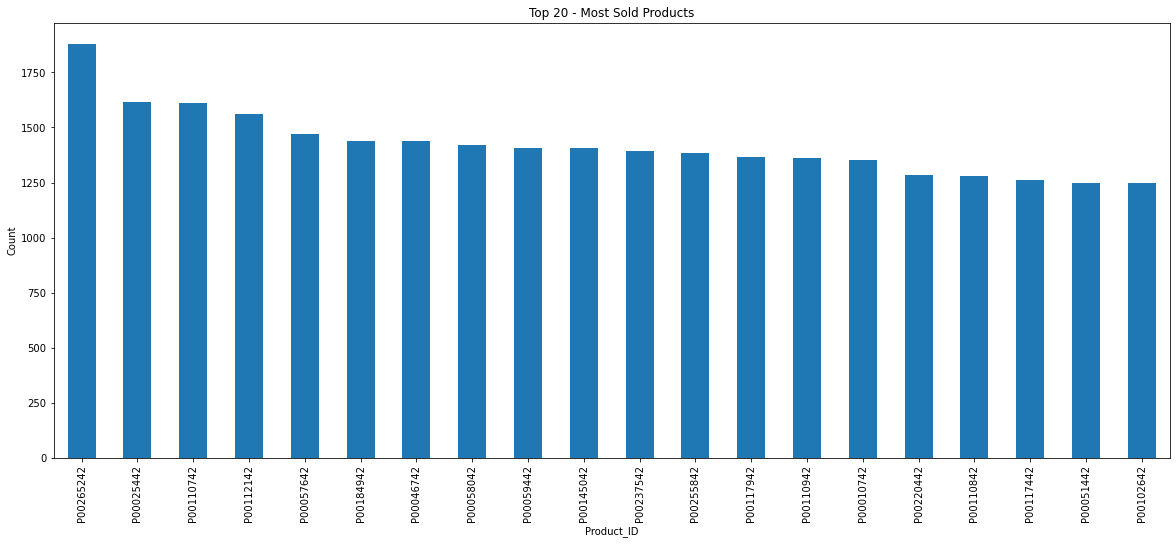

In [13]:
Most_Sold_Products.plot(kind='bar', figsize =(20,8), title='Top 20 - Most Sold Products',ylabel='Count')

<AxesSubplot:title={'center':'Top 20 - Users Purchasing Most'}, xlabel='User_ID', ylabel='Amount Spent'>

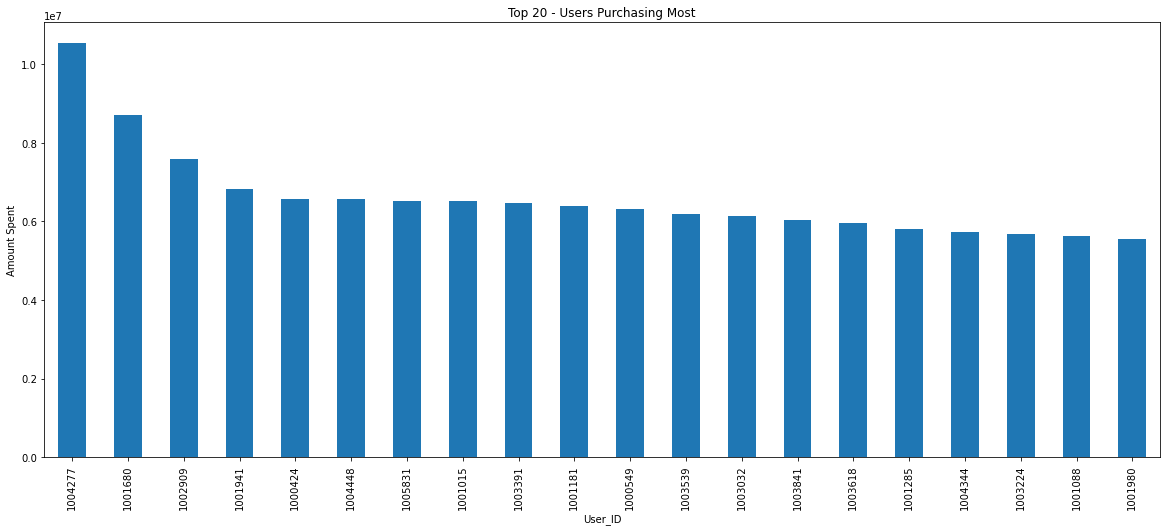

In [14]:
# Simiarily we can explore the customers who purchased the most, 
# so those can be targeted for any loyalty, advertizing/marketing 

Users_Purchasing_Most = data.groupby('User_ID')['Purchase'].sum().nlargest(20).sort_values(ascending=False)
Users_Purchasing_Most.plot(kind='bar', figsize =(20,8), title='Top 20 - Users Purchasing Most',ylabel='Amount Spent')

<AxesSubplot:xlabel='Age', ylabel='count'>

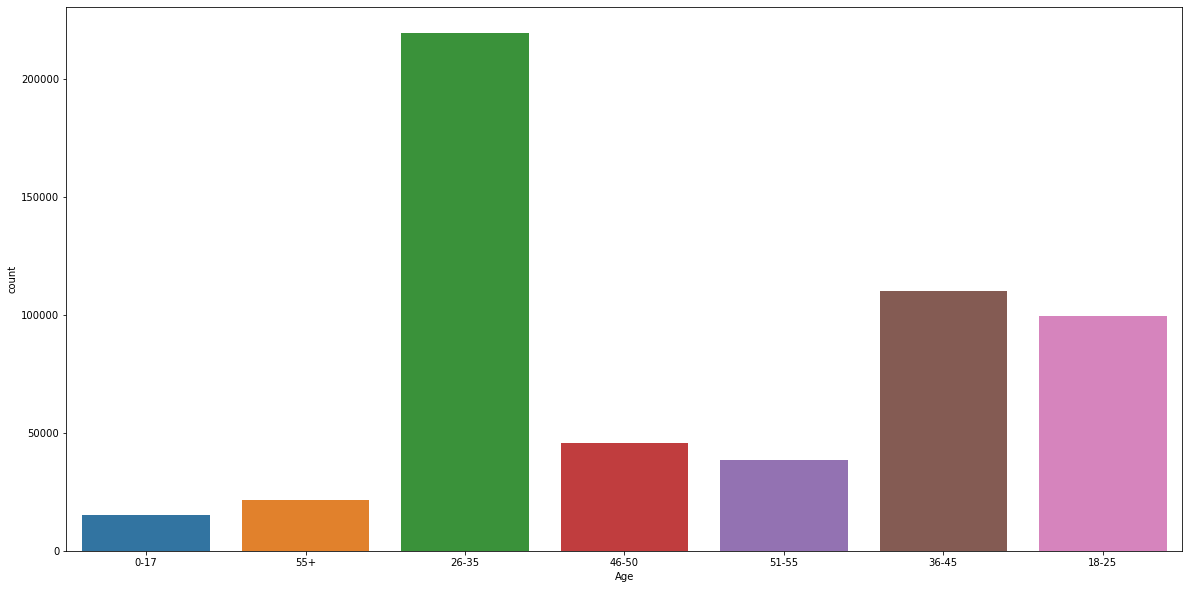

In [15]:
# We found a particular Customer age group/bins was the top in spending, lets check the age wise distribution of that data
sns.countplot(x='Age' , data=data)

# Top spending Age group seems to be 26-35 and next Age group seems to be 36-45, showing almost half of the Top one
# Customers with family having purhasing power to spend

<AxesSubplot:xlabel='Age', ylabel='count'>

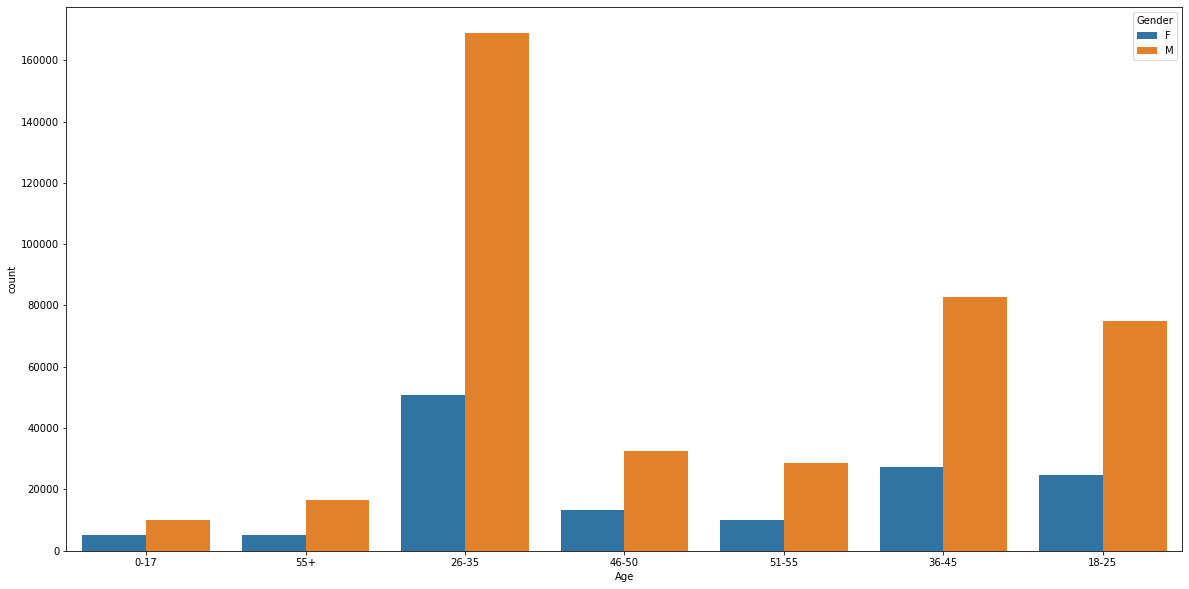

In [16]:
# Though we know the Men seems to be the gender outnumbering, we can quickly glance the Gender distribution too

sns.countplot(x='Age',hue='Gender', data=data)



In [72]:
# Men outnumbering the Female count, lets check the % of genders for the Top group(26-35 yrs)

age_data = data.groupby(['Age', 'Gender'])['Gender'].count().unstack()
Top_Group_Female_Percent = (age_data['F'][2]/age_data['M'][2]*100)

print("% of Female Gender - " + "{:.2f}".format(Top_Group_Female_Percent))


% of Female Gender - 30.06


In [17]:
# Exploring the occupation details for this Top Age group (26-35 Yrs)

data_Occupation = data.groupby(['Age', 'Occupation'])['Occupation'].count().unstack()
data_Occupation

Occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,,
0-17,2134.0,387.0,144.0,NaN,113.0,NaN,NaN,139.0,29.0,NaN,...,18.0,237.0,15.0,93.0,NaN,NaN,35.0,NaN,807.0,NaN
18-25,9095.0,3820.0,4364.0,1860.0,48241.0,1450.0,1144.0,2078.0,14.0,559.0,...,717.0,4585.0,NaN,4388.0,906.0,1816.0,3944.0,1085.0,2500.0,5445.0
26-35,34204.0,19080.0,12617.0,8159.0,21829.0,6082.0,7216.0,24060.0,378.0,1489.0,...,5009.0,15279.0,NaN,13446.0,6874.0,7070.0,17064.0,2243.0,3468.0,13994.0
36-45,13393.0,9501.0,5183.0,4126.0,1747.0,3066.0,4822.0,18762.0,98.0,3096.0,...,2732.0,6848.0,427.0,5590.0,2585.0,7572.0,10252.0,1527.0,1008.0,7508.0
46-50,4488.0,7089.0,2124.0,1599.0,129.0,1187.0,2561.0,6664.0,549.0,528.0,...,1584.0,2491.0,631.0,1445.0,854.0,3032.0,4662.0,1124.0,261.0,2699.0
51-55,4602.0,4410.0,1344.0,1094.0,249.0,377.0,3952.0,5355.0,317.0,398.0,...,1383.0,1417.0,1785.0,1012.0,514.0,3918.0,2528.0,531.0,200.0,3115.0
55+,1722.0,3139.0,812.0,812.0,NaN,15.0,660.0,2075.0,161.0,221.0,...,143.0,322.0,4870.0,1335.0,432.0,1963.0,1558.0,112.0,217.0,801.0


<AxesSubplot:xlabel='Age'>

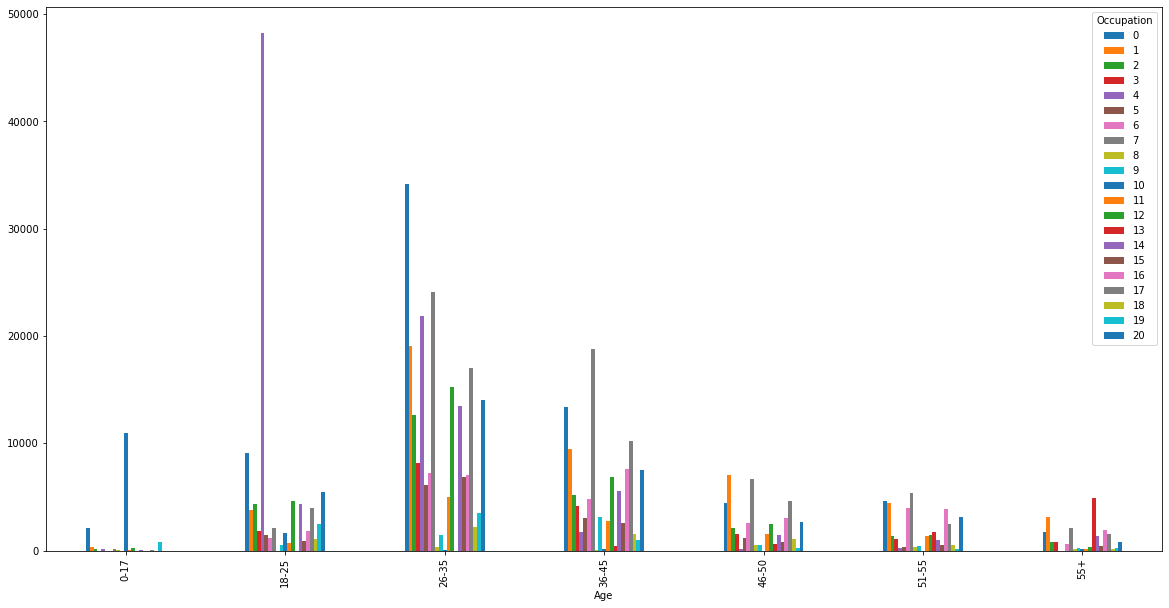

In [18]:
data_Occupation.plot(kind='bar')

In [83]:
# Slicing the Customer Occupation details for the Top Age Group Bracket
# Occupation # 0,7 & 4 seem to be the occcupations/Professions - which can beused for targetted marketing by Industry
data_Occupation.iloc[2][:].sort_values(ascending = False)

Occupation
0     34204.0
7     24060.0
4     21829.0
1     19080.0
17    17064.0
12    15279.0
20    13994.0
14    13446.0
2     12617.0
3      8159.0
6      7216.0
16     7070.0
15     6874.0
5      6082.0
11     5009.0
19     3468.0
18     2243.0
9      1489.0
8       378.0
10       26.0
13        NaN
Name: 26-35, dtype: float64

In [86]:
# Query the target Customers to find the Products they bought
# Product_Category_1 & Product_Category_2 is what these customers are purchasing most
# These products in particular can be targetted for any discount/ coupons for these customers

data.query("Age=='26-35'").groupby('Age')[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].count().unstack()

                    Age  
Product_Category_1  26-35    219587
Product_Category_2  26-35    219587
Product_Category_3  26-35     66942
dtype: int64

In [105]:
# Lets check by Marital Status the Purchase details
Purchase_Amount_By_Married = data[(data['Marital_Status'] == 1) & (data['Age'] == '26-35')]['Purchase'].sum()
Purchase_Amount_By_Single = data[(data['Marital_Status'] == 0) & (data['Age'] == '26-35')]['Purchase'].sum()

print('Amount spent by Married Customers - {:,} Vs Single in the Age bracket (26-35 yrs) - {:,}'.format(Purchase_Amount_By_Married,Purchase_Amount_By_Single))


Amount spent by Married Customers - 798,440,476 Vs Single in the Age bracket (26-35 yrs) - 1,233,330,102


## Final Analysis Details -

#### Black Friday Sales data shows the Customers in the Age group of 26-35 yrs have spent most on the Product_Category_1 & Product_Category_2. Moreover these customers who are Single Males seem to be spending more than the Females, who are having occupations - # 0,7 & 4.